In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist

import dionysus as d

from biomarker.data_collection import *

data_collection


In [2]:
EXCLUDE_KEYS = [206, 205, 184, 183, 82, 81, 45]
excel = parse_master_file(exclude_keys=EXCLUDE_KEYS).reset_index().drop(['index'], axis=1)
L = get_filename_list(excel['Associated data'])

[3, 9]


In [3]:
x1s = []
for l in L:
    x1s.append(parse_x1(l))

In [12]:
POI = 5
x1s[POI]

,Center Number,Atomic Number,X,Y,Z
0,1,6,-1.878862,-0.939439,-0.120080
1,2,6,-0.529289,-1.272660,-0.028914
2,3,6,0.417921,-0.257059,0.116863
3,4,6,-0.054787,1.056136,0.152680
4,5,6,-1.425029,1.284718,0.049581
5,6,7,-2.336887,0.315336,-0.083667
6,7,6,1.890790,-0.582913,0.263956
7,8,7,2.749923,0.475614,-0.270828
8,9,1,-2.627152,-1.719245,-0.233553
9,10,1,-0.225599,-2.313544,-0.075319


<IPython.core.display.Javascript object>


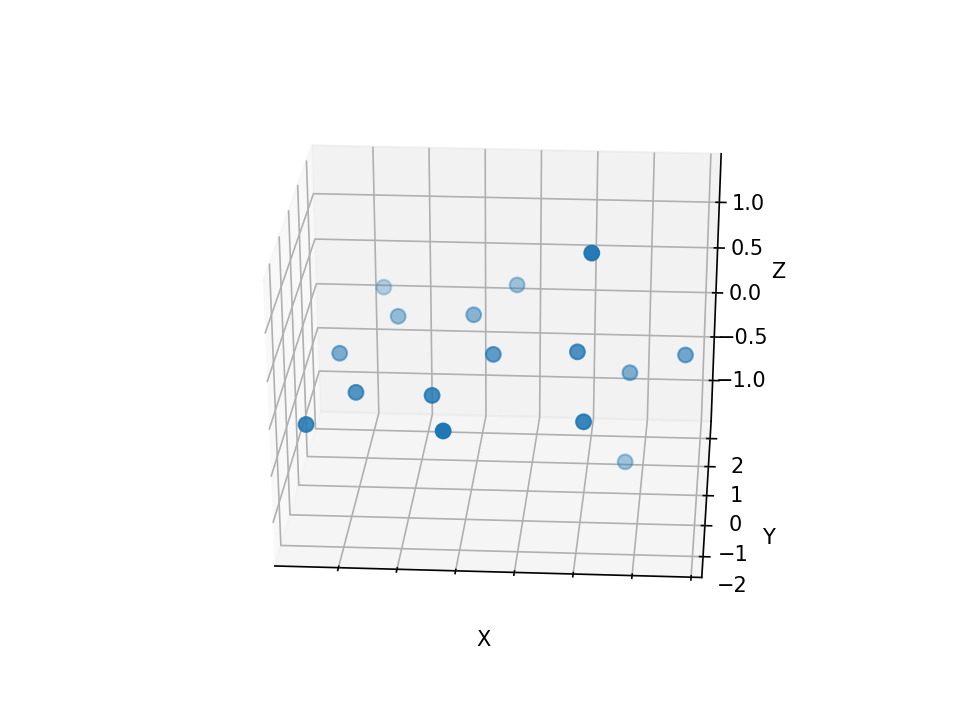

Text(0.5,0,'Z')

In [13]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1s[POI].X, x1s[POI].Y, x1s[POI].Z, s=50)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    right='off', 
    left='off', 
    labelleft='off',
    labelright='off') #
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1s[POI].X, x1s[POI].Y, x1s[POI].Z, s=500)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [ ]:
points = x1s[POI][['X', 'Y', 'Z']].values
dists = pdist(points, 'euclidean')
# r = np.mean(dists)
r = 5

In [ ]:
k = 5
print(k, r)
f = d.fill_rips(points, k, r)
print(f)

In [ ]:
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)
print(dgms)
for i, dgm in enumerate(dgms):
    for pt in dgm:
        print(i, pt.birth, pt.death)

In [ ]:
d.plot.plot_diagram(dgms[1], show = True)

In [ ]:
d.plot.plot_bars(dgms[1], show = True)

In [ ]:
r = 6
k = 2
results = []
for i in range(len(x1s)):
    print('step: {}'. format(i))
    for j in range(len(x1s)):
        pointsi = x1s[i][['X', 'Y', 'Z']].values
        fi = d.fill_rips(pointsi, k, r)
        mi = d.homology_persistence(fi)
        dgmsi = d.init_diagrams(mi, fi)
        if i != j:
            pointsj = x1s[j][['X', 'Y', 'Z']].values
            fj = d.fill_rips(pointsj, k, r)
            mj = d.homology_persistence(fj)
            dgmsj = d.init_diagrams(mj, fj)
            
            wdist = d.wasserstein_distance(dgmsi[1], dgmsj[1], q=2)
            logKdist = excel['Output: logK'][i] - excel['Output: logK'][j]
            
            results.append({'wasserstein': wdist, 'logK': logKdist})
            

In [ ]:
resdf = pd.DataFrame(results)
print(resdf.shape)
resdf.head()

In [ ]:
X = resdf[np.abs(resdf['logK']) > 0]
plt.scatter(X['wasserstein'], np.abs(X['logK']), alpha=0.01)

In [ ]:
r = 6
k = 2
results = []
for i in range(len(x1s)):
    print('step: {}'. format(i))
    for j in range(len(x1s)):
        pointsi = x1s[i][['X', 'Y', 'Z']].values
        fi = d.fill_rips(pointsi, k, r)
        mi = d.homology_persistence(fi)
        dgmsi = d.init_diagrams(mi, fi)
        if i != j:
            pointsj = x1s[j][['X', 'Y', 'Z']].values
            fj = d.fill_rips(pointsj, k, r)
            mj = d.homology_persistence(fj)
            dgmsj = d.init_diagrams(mj, fj)
            
            wdist = d.bottleneck_distance(dgmsi[1], dgmsj[1])
            logKdist = excel['Output: logK'][i] - excel['Output: logK'][j]
            
            results.append({'bottleneck': wdist, 'logK': logKdist})

In [ ]:
resdf_bottle = pd.DataFrame(results)
print(resdf_bottle.shape)
resdf_bottle.head()

In [ ]:
X = resdf_bottle[np.abs(resdf['logK']) > 0]
plt.scatter(X['bottleneck'][-191:], np.abs(X['logK'][-191:]), alpha=0.01)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
y_buck = excel['Output: logKbucket'].values

rbf_kernel(X, y_buck)